<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_8/8_6_Diffusion_HF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install -q diffusers transformers safetensors

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from PIL import Image
import numpy as np

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


#Text2Image

In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")

In [ ]:
prompt = (
    "a cute fluffy anime-style cat with big sparkling eyes, soft pastel colors, "
    "sitting in a field of glowing flowers, highly detailed, gentle lighting, "
    "studio quality anime illustration"
)
image = pipe(prompt).images[0]

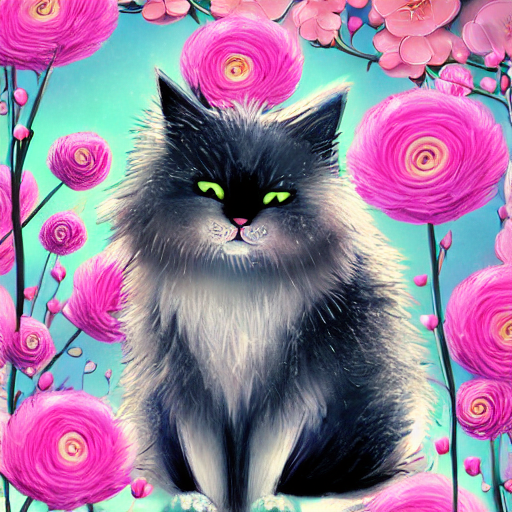

In [32]:
image

#Image2Image

Image shape: (427, 640, 3)
dtype: uint8


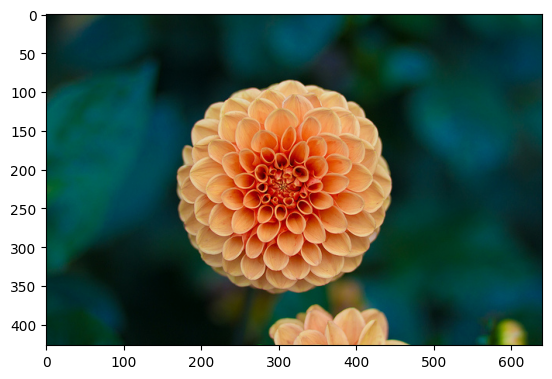

In [33]:
img = load_sample_image("flower.jpg")
H, W, C = img.shape
print("Image shape:", img.shape)
print("dtype:", img.dtype)

plt.imshow(img)
plt.show()


In [34]:
flower = Image.fromarray(img)

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
# завантажуємо модель
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4").to("cuda")

In [ ]:
prompt = "an oil painting of this flower in the style of Vincent van Gogh, thick swirling brush strokes, vibrant colors, expressive texture"

result = pipe(
    prompt=prompt,
    image=flower,
    strength=0.7,
    guidance_scale=7.5
).images[0]


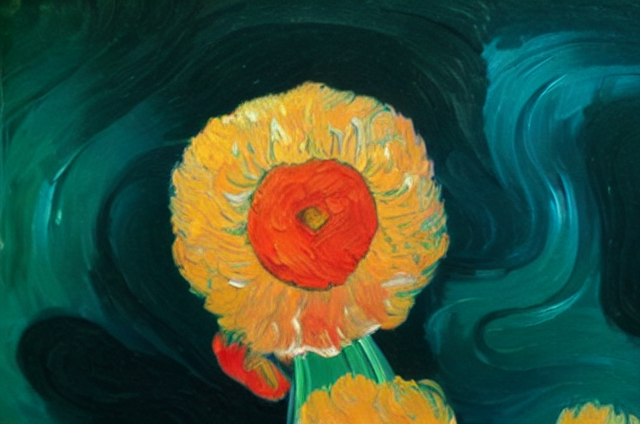

In [38]:
result

In [ ]:
prompt = "a surreal distorted version of this flower, neon cyberpunk style"
result = pipe(
    prompt=prompt,
    image=flower,
    strength=0.7,
    guidance_scale=7.5
).images[0]


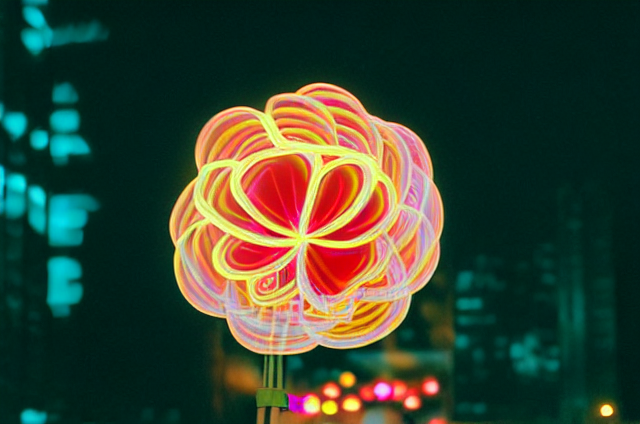

In [40]:
result